In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

file_path = '/Users/RobertHolzmann/Downloads/Blogpost/Datasets/defense_contractors.csv'

df = pd.read_csv(file_path)

#pd.set_option('display.max_rows', None)


df.head()

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2003,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$4.20 B,$4.68 B,$0.55 B
1,AM.PA,2004,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$6.10 B,$4.69 B,$0.63 B
2,AM.PA,2005,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$6.94 B,$4.07 B,$0.52 B
3,AM.PA,2006,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$8.95 B,$4.42 B,$0.55 B
4,AM.PA,2007,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$9.43 B,$5.99 B,$0.82 B


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      340 non-null    object
 1   Year        340 non-null    int64 
 2   Name        340 non-null    object
 3   Country     340 non-null    object
 4   Category    340 non-null    object
 5   Market cap  337 non-null    object
 6   Revenue     314 non-null    object
 7   Earnings    315 non-null    object
dtypes: int64(1), object(7)
memory usage: 21.4+ KB


In [3]:
df.isnull().sum()

Symbol         0
Year           0
Name           0
Country        0
Category       0
Market cap     3
Revenue       26
Earnings      25
dtype: int64

In [4]:
# Drop null values from the dataframe
df.dropna(inplace=True)   

df.isnull().sum()

Symbol        0
Year          0
Name          0
Country       0
Category      0
Market cap    0
Revenue       0
Earnings      0
dtype: int64

In [5]:
# Converting object dtype columns to string dtype
df['Name'] = df['Name'].astype('string')
df['Country'] = df['Country'].astype('string')
df['Category'] = df['Category'].astype('string')
df['Symbol'] = df['Symbol'].astype('string')

# Converting year from object to datetime 
df['Year'] = pd.to_datetime(df['Year'],format='%Y')
df['Year'] = df.Year.dt.year

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 339
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      311 non-null    string
 1   Year        311 non-null    int64 
 2   Name        311 non-null    string
 3   Country     311 non-null    string
 4   Category    311 non-null    string
 5   Market cap  311 non-null    object
 6   Revenue     311 non-null    object
 7   Earnings    311 non-null    object
dtypes: int64(1), object(3), string(4)
memory usage: 21.9+ KB


In [7]:
# Create a function to convert the Revenue, Earnings and Market Cap columns to numbers and dealing with the '$' and 'B'
def clean_currency(df, column):
    '''
    INPUT: 
    df - pandas dataframe with columns to be formated and cleaned
    column - column that needs to be formated and cleaned

    OUTPUT:
    df[column] is the cleaned and formated column replacing original
    '''

    # Convert column to string type if not already
    df[column] = df[column].astype(str)

    # Split string with '$' and take only 2nd element without '$'
    array = df[column].str.split("$", n=1, expand=True)
    if array.shape[1] > 1:  # Check if there's a second column after splitting
        df[column] = array[1]
    else:
        df[column] = array[0]  # Keep the original column if no '$' was found

    # Split string with blank space and take only 1st element without 'B' for billion
    array = df[column].str.split(" ", n=1, expand=True)
    df[column] = array[0]

    # Convert the string to a float
    df[column] = df[column].astype(float)

    return df[column]

In [8]:
# Clean and format 'Revenue'

clean_currency(df, 'Revenue')

0       4.68
1       4.69
2       4.07
3       4.42
4       5.99
       ...  
335    28.11
336    20.45
337    17.13
338    20.38
339    25.64
Name: Revenue, Length: 311, dtype: float64

In [9]:
# Clean and format 'Earnings'

clean_currency(df, 'Earnings')

0      0.55
1      0.63
2      0.52
3      0.55
4      0.82
       ... 
335    3.89
336    0.70
337    0.30
338    1.89
339    3.12
Name: Earnings, Length: 311, dtype: float64

In [10]:
# Clean and format 'Market Cap'

clean_currency(df, 'Market cap')

0       4.20
1       6.10
2       6.94
3       8.95
4       9.43
       ...  
335    65.48
336    60.88
337    52.03
338    53.21
339    72.94
Name: Market cap, Length: 311, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 339
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      311 non-null    string 
 1   Year        311 non-null    int64  
 2   Name        311 non-null    string 
 3   Country     311 non-null    string 
 4   Category    311 non-null    string 
 5   Market cap  311 non-null    float64
 6   Revenue     311 non-null    float64
 7   Earnings    311 non-null    float64
dtypes: float64(3), int64(1), string(4)
memory usage: 21.9 KB


In [12]:
df

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2003,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,4.20,4.68,0.55
1,AM.PA,2004,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,6.10,4.69,0.63
2,AM.PA,2005,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,6.94,4.07,0.52
3,AM.PA,2006,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,8.95,4.42,0.55
4,AM.PA,2007,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,9.43,5.99,0.82
...,...,...,...,...,...,...,...,...
335,SAFRF,2019,Safran,France,CAC 40|Aerospace|Defense contractors,65.48,28.11,3.89
336,SAFRF,2020,Safran,France,CAC 40|Aerospace|Defense contractors,60.88,20.45,0.70
337,SAFRF,2021,Safran,France,CAC 40|Aerospace|Defense contractors,52.03,17.13,0.30
338,SAFRF,2022,Safran,France,CAC 40|Aerospace|Defense contractors,53.21,20.38,1.89


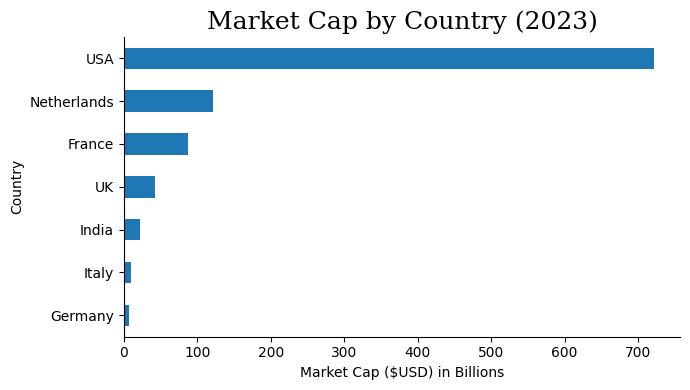

In [13]:
# Grouping countries together and combining Market Caps for 2023 for barchart
df_2023 = df[df['Year'] == 2023] # Create df for only 2023 values 

# Group by 'Country' and sum 'Market cap'
market_cap_by_country = df_2023.groupby('Country')[['Market cap']].sum().sort_values(by='Market cap')

# Create the plot with figsize
ax = market_cap_by_country.plot(kind='barh', figsize=(7, 4))

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 18
       }


plt.title('Market Cap by Country (2023)', fontdict=font)
plt.xlabel('Market Cap ($USD) in Billions')
plt.ylabel('Country')

plt.gca().spines[['top', 'right']].set_visible(False) # Removes spines from top and right of barchart
plt.tight_layout()
plt.legend().remove() # Remove legend
plt.show()


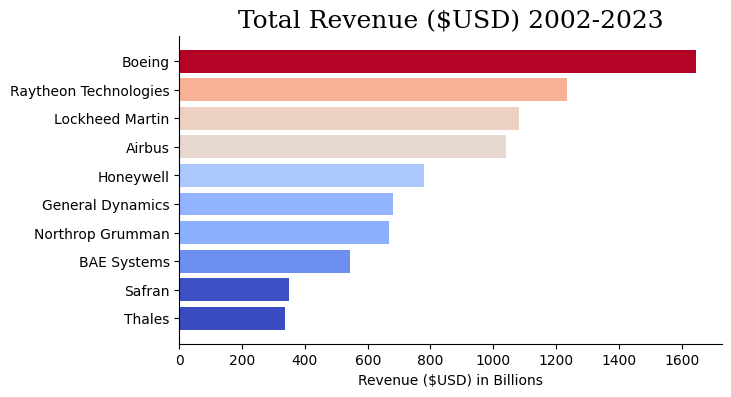

In [14]:

# Group by defense company and combine revenue over the years
revenue_by_company = df.groupby('Name')['Revenue'].sum().sort_values(ascending=False)

# Select the top 10 companies
top_companies = revenue_by_company.head(10)

# Sort top 10 companies in ascending order for plotting 
top_companies = top_companies.sort_values(ascending=True)

# Normalize the revenue values to the range [0, 1] for colormap
norm = plt.Normalize(top_companies.min(), top_companies.max())

# Choose a colormap
cmap = plt.cm.coolwarm

# Map the normalized values to colors
colors = cmap(norm(top_companies.values))

# Create the horizontal bar chart 
fig, ax = plt.subplots(figsize=(7, 4))

bars = ax.barh(top_companies.index, top_companies, color=colors)

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 18
       }

# Set titles and labels with custom font
ax.set_title('Total Revenue ($USD) 2002-2023', fontdict=font)
ax.set_xlabel('Revenue ($USD) in Billions')
ax.set_ylabel('')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




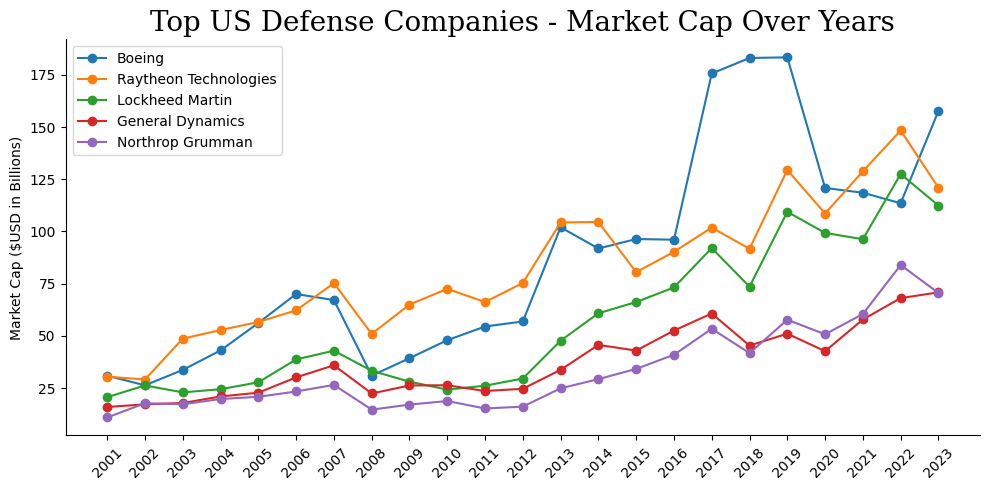

In [15]:
# Group and plot top US defense companies' market cap on the same graph

# Create a list of top companies
companies = ['Boeing', 'Raytheon Technologies', 'Lockheed Martin', 'General Dynamics', 'Northrop Grumman']

plt.figure(figsize=(10, 5))

# Iterate through each company
for company in companies:
    df_company = df[df['Name'] == company] # Create df for each company
    grouped_data = df_company.groupby('Year')['Market cap'].sum() # Group companies by year and market cap
    plt.plot(grouped_data.index, grouped_data.values, label=company, marker='o') # Get years with .index and market cap with .values

# To display each year 2001-2023
all_years = np.arange(df['Year'].min(), df['Year'].max() + 1) 

plt.xticks(ticks=all_years, labels=all_years, rotation=45) # Display each year along x-axis

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 20
       }

plt.title('Top US Defense Companies - Market Cap Over Years', fontdict=font)
plt.xlabel('')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)  # Remove top and right spines
plt.legend() # Show legend of companies
#plt.grid(True)  
plt.tight_layout()  
plt.show()


In [16]:
# Another (cleaner in my opinion) way to create the same graph as above with pivot tables

# Create a list of top companies
companies = ['Boeing', 'Raytheon Technologies', 'Lockheed Martin', 'Northrop Grumman',  'General Dynamics']

# Create the pivot table with year as the index, companies as the columns and market cap as the values  
market_cap_trends = df.pivot_table(values='Market cap', index='Year', columns='Name', aggfunc='sum')[companies]

market_cap_trends

Name,Boeing,Raytheon Technologies,Lockheed Martin,Northrop Grumman,General Dynamics
Year,,,,,
2001,30.94,30.51,20.69,10.98,15.98
2002,26.37,29.14,26.31,17.77,17.26
2003,33.72,48.71,22.98,17.31,17.89
2004,43.08,52.82,24.50,19.81,21.02
2005,56.20,56.68,27.80,20.87,22.83
2006,70.07,62.25,38.76,23.41,30.16
2007,67.17,75.28,42.95,26.56,35.95
2008,31.00,50.95,33.32,14.72,22.45
2009,39.33,65.01,28.10,17.13,26.29


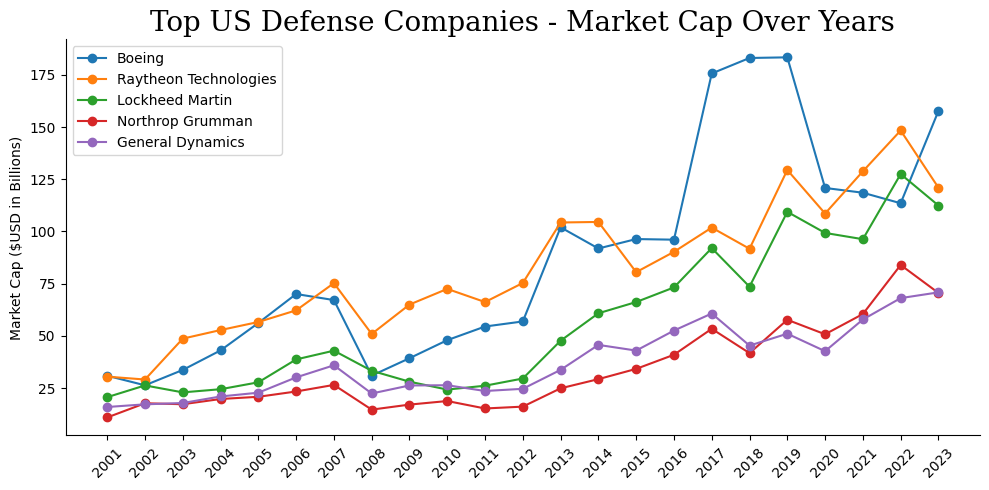

In [17]:
# Plot line graph of Market Cap pivot table
market_cap_trends.plot(kind='line', figsize=(10, 5), marker = 'o') 

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 20
       }

plt.title('Top US Defense Companies - Market Cap Over Years', fontdict=font)
plt.xlabel('')
plt.ylabel('Market Cap ($USD in Billions)')

# To display each year 2001-2023 along x-axis
all_years = np.arange(df['Year'].min(), df['Year'].max() + 1) 
plt.xticks(ticks=all_years, labels=all_years, rotation=45) 

plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Creating the same graph as above but with Revenue

# Create a list of top companies
companies = ['Boeing', 'Raytheon Technologies', 'Lockheed Martin', 'Northrop Grumman',  'General Dynamics']

# Create the pivot table with year as the index, companies as the columns and revenue as the values  
revenue_trends = df.pivot_table(values='Revenue', index='Year', columns='Name', aggfunc='sum')[companies]

revenue_trends

Name,Boeing,Raytheon Technologies,Lockheed Martin,Northrop Grumman,General Dynamics
Year,,,,,
2001,58.19,27.48,23.99,13.55,12.16
2002,54.06,27.98,26.57,17.52,13.82
2003,50.48,30.72,31.82,26.20,16.61
2004,52.51,36.70,35.52,29.73,19.18
2005,54.84,42.27,37.21,30.72,21.24
2006,61.53,47.11,39.62,30.23,24.08
2007,66.38,54.75,41.86,32.02,27.24
2008,60.90,58.04,42.73,33.88,29.30
2009,68.28,52.42,45.18,33.75,31.98


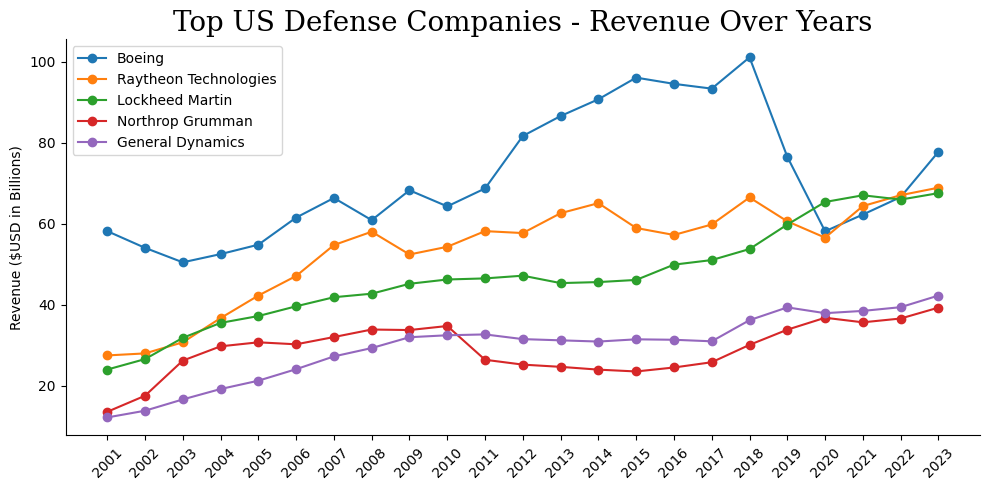

In [19]:
# Plot line graph of revenue pivot table
revenue_trends.plot(kind='line', figsize=(10, 5), marker = 'o')

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 20
       }

plt.title('Top US Defense Companies - Revenue Over Years', fontdict=font)
plt.xlabel('')
plt.ylabel('Revenue ($USD in Billions)')

# To display each year 2001-2023 along x-axis
all_years = np.arange(df['Year'].min(), df['Year'].max() + 1) 
plt.xticks(ticks=all_years, labels=all_years, rotation=45) 
 
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.tight_layout()  
plt.show()

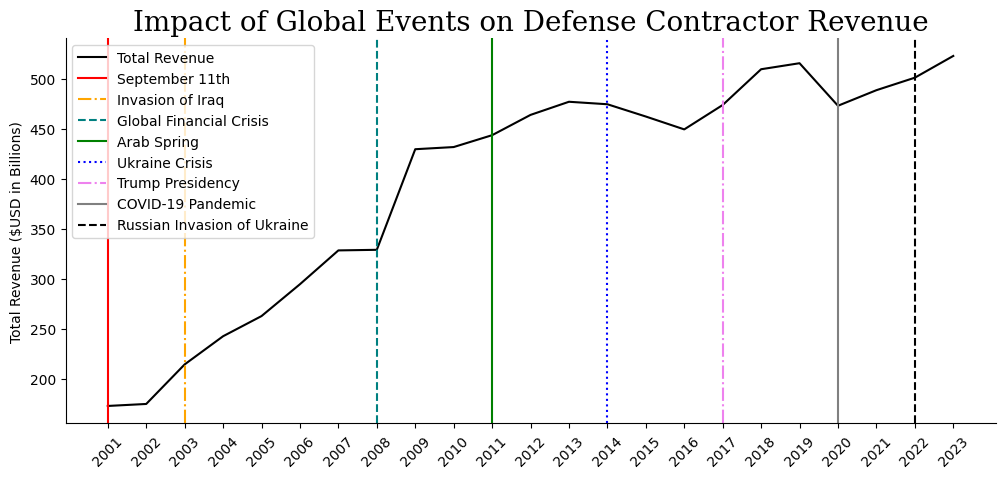

In [20]:
# Line graph that tracks total revenue for all companies in df over time period with years of major world events highlighted

# Create a dictionary of global events with different colors and line styles
key_events = {
    '2001': {'event': 'September 11th', 'color': 'red', 'linestyle': '-'},
    '2003': {'event': 'Invasion of Iraq', 'color': 'orange', 'linestyle': '-.'},
    '2008': {'event': 'Global Financial Crisis', 'color': 'teal', 'linestyle': '--'},
    '2011': {'event': 'Arab Spring', 'color': 'green', 'linestyle': '-'},
    '2014': {'event': 'Ukraine Crisis', 'color': 'blue', 'linestyle': ':'},
    '2017': {'event': 'Trump Presidency', 'color': 'violet', 'linestyle': '-.'},
    '2020': {'event': 'COVID-19 Pandemic', 'color': 'grey', 'linestyle': '-'},
    '2022': {'event': 'Russian Invasion of Ukraine', 'color': 'black', 'linestyle': '--'}
}

# Aggregate revenue by year 
yearly_revenue = df.groupby('Year')['Revenue'].sum()

# Plot revenue with key events
plt.figure(figsize=(12, 5))
plt.plot(yearly_revenue.index, yearly_revenue.values,  label='Total Revenue', color='black')


# Add vertical lines using key_events dictionary 
for year, event in key_events.items():
    plt.axvline(x=int(year), color=event['color'], linestyle=event['linestyle'], label=event['event'])

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 20
       }

plt.title('Impact of Global Events on Defense Contractor Revenue', fontdict=font)
plt.xlabel('')
plt.ylabel('Total Revenue ($USD in Billions)')

# To display each year 2001-2023 along x-axis
all_years = np.arange(df['Year'].min(), df['Year'].max() + 1) 

plt.xticks(ticks=all_years, labels=all_years, rotation=45) 

plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()


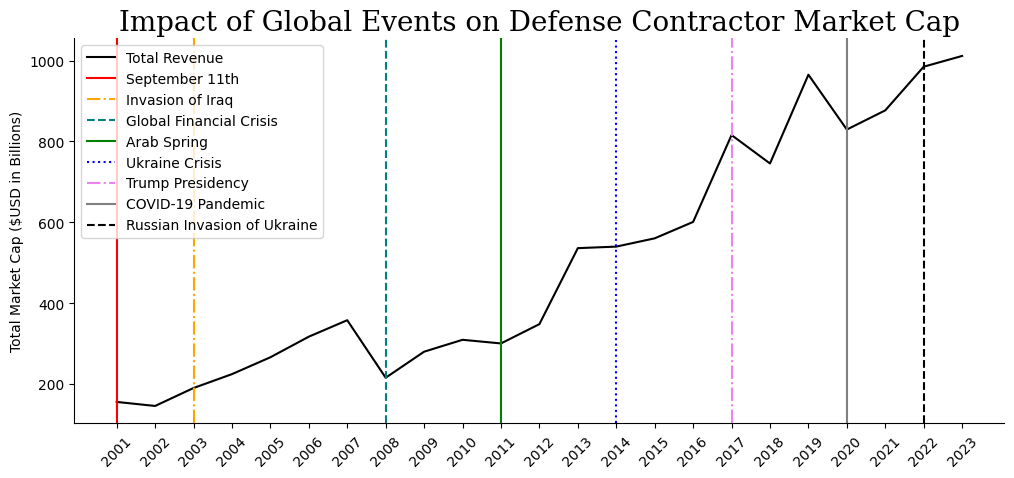

In [23]:
# Line graph that tracks total market cap for all companies in df over time period with years of major world events highlighted

# Create a dictionary of global events with different colors and line styles
key_events = {
    '2001': {'event': 'September 11th', 'color': 'red', 'linestyle': '-'},
    '2003': {'event': 'Invasion of Iraq', 'color': 'orange', 'linestyle': '-.'},
    '2008': {'event': 'Global Financial Crisis', 'color': 'teal', 'linestyle': '--'},
    '2011': {'event': 'Arab Spring', 'color': 'green', 'linestyle': '-'},
    '2014': {'event': 'Ukraine Crisis', 'color': 'blue', 'linestyle': ':'},
    '2017': {'event': 'Trump Presidency', 'color': 'violet', 'linestyle': '-.'},
    '2020': {'event': 'COVID-19 Pandemic', 'color': 'grey', 'linestyle': '-'},
    '2022': {'event': 'Russian Invasion of Ukraine', 'color': 'black', 'linestyle': '--'}
}

# Aggregate market cap by year 
market_cap = df.groupby('Year')['Market cap'].sum()

# Plot market cap with key events
plt.figure(figsize=(12, 5))
plt.plot(market_cap.index, market_cap.values,  label='Total Revenue', color='black')


# Add vertical lines using key_events dictionary 
for year, event in key_events.items():
    plt.axvline(x=int(year), color=event['color'], linestyle=event['linestyle'], label=event['event'])

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 20
       }

plt.title('Impact of Global Events on Defense Contractor Market Cap', fontdict=font)
plt.xlabel('')
plt.ylabel('Total Market Cap ($USD in Billions)')

# To display each year 2001-2023 along x-axis
all_years = np.arange(df['Year'].min(), df['Year'].max() + 1) 
plt.xticks(ticks=all_years, labels=all_years, rotation=45) 

plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()


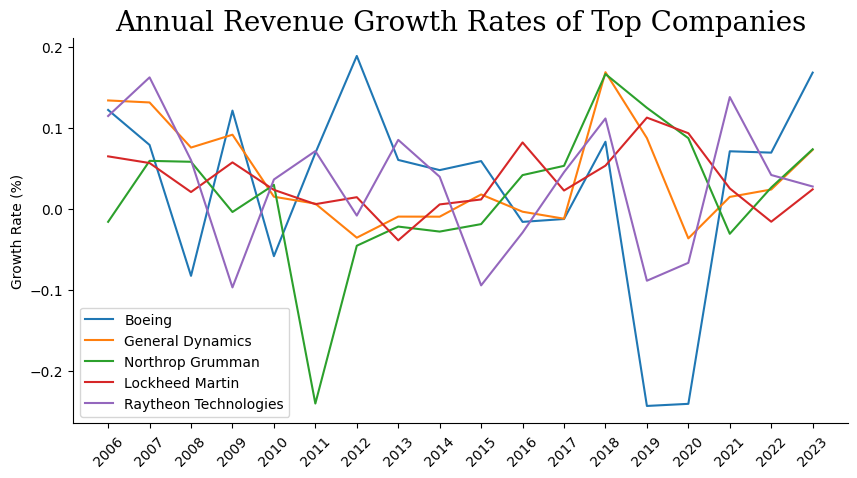

In [25]:
# Calculate annual growth rates for each company
df['Revenue Growth'] = df.groupby('Name')['Revenue'].pct_change()
df['Market Cap Growth'] = df.groupby('Name')['Market cap'].pct_change()
df['Earnings Growth'] = df.groupby('Name')['Earnings'].pct_change()

# Filter top companies
top_companies = ['Boeing', 'General Dynamics', 'Northrop Grumman', 'Lockheed Martin', 'Raytheon Technologies']
# Create new dataframe with only top companies
growth_data = df[df['Name'].isin(top_companies)]

# Filter data for the past 10 years
recent_years = 18
latest_year = df['Year'].max()
start_year = latest_year - recent_years + 1
growth_data = growth_data[growth_data['Year'] >= start_year]

# Create fontdict to format font
font = {'family': 'serif',
        'weight': 'normal',
        'size': 20
       }

# Plot growth rates
plt.figure(figsize=(10, 5))
for company in top_companies:
    company_data = growth_data[growth_data['Name'] == company]
    plt.plot(company_data['Year'], company_data['Revenue Growth'], label=f'{company}')

plt.title('Annual Revenue Growth Rates of Top Companies', fontdict=font)
plt.xlabel('')
plt.ylabel('Growth Rate (%)')

# To display each year 2001-2023 along x-axis
# Display each year along x-axis
all_years = np.arange(start_year, latest_year + 1)
plt.xticks(ticks=all_years, labels=all_years, rotation=45)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()